# Simulating Using Random Variables

Randomness, or apparent randomness, is a major part of the world we live from the movement of gas molecules in the air we breath to the outcome of a coin toss. While many events are not truely random, they are often close enough to random or seemingly random enough to be simulated as such. Despite many processes being random, their outcomes often conform to a statistical pattern if enough of these random events occur. For example, if we roll a six-sided die over a large number of rolls, we expect to roll a 5 about $\frac{1}{6}$ of the time. As a general rule, the larger the number of random events observed, the closer the distribution of these events will *likely* be to the expected disbribution. In this tutorial, we will use a random number generator provided in NumPy to solve a number of problems through stochastic simulations. While the problems demonstrated below all have know solutions or equations, you may face other problems that do not have an analytical model or known solution. The methodology demonstrated below can be used to solve problems when no known solution or model exists. 

## What you'll do
- Generate random values using NumPy to power stochastic simulations
- Perform stochastic simulations to determine the
    - Likelyhood of multiple children in a classroom of 25 having the same birthday
    - Distribution of marbles in a Galton board
    - Value of $\pi$
    - Amount of radioactive material left versus time
- Compare the above simulations to known values or an analytical model

## What you'll learn:
- Generating large quantites of random values in a desired distribution
- Using random values to simulation a range of scenarios and solve problems

## What you'll need:
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- Python's `math` module

The above two packages are imported using the following commands:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Generating random variables

NumPy can generate random variables using a Generator from the `np.random` module. While these values are not truely random, they are close enough for the following applications. One of the advantages of using NumPy to generate variables over the standard `random` Python module is that NumPy can generate a large number of random variables efficiently without the use of a `for` loop. These variables can be generated in a variety of probability distribution including normal, poisson, and binomial; but for the following simulations, we will mostly use even distributions where all numbers in the range have an equal likelyhood of being generated. This is accomplished by first creating a Generator using the `np.random.default_rng()` function and then using `random(n)` or `np.integers(low, high=, size=n)` methods with the Generator to produce random values where `n` is the number of random values returned. Below are some common methods for generating random values.

| Method  | Description |
|-----------|-------------|
|`random(n)`| Generates `n` float values in the [0,1) range with an even distribution |
|`integers(low, high=, size=)`| Generates `size` integers in the requested range [low, high) in a uniform distribution|
|`normal(loc, scale=, size=)`| Generates `size` floats in a normal distribution centered on `loc` with a `scale` standard deviation|
|`binomial(t, p, size=)`| Generates `size` integers in a bionimial distribution with `t` trials for each value with a probability `p`|
|`choice(a, size=)`| Selects `size` elements from `a` list, tuple or ndarray with an even probability |
|`shuffle(a)`| Shuffles items in list, tubple, or ndarray `a` |

In [2]:
rng = np.random.default_rng(seed=18)
rng.random(10)

array([0.39930577, 0.71741468, 0.28082333, 0.08272492, 0.96977132,
       0.56392675, 0.64432096, 0.57687146, 0.47536097, 0.12240199])

You may have guessed by looking at the returned values that `random()` produces values in the 0 $\rightarrow$ 1 range, but what happens if we need values in a different range? We can modify these values by mutiplying them by a coefficient to increase the range and using addition or substration to shift the center of the range. For example, if we need random values from -10 $\rightarrow$ +10, we can accomplish this by the following.

In [3]:
20 * rng.random(10) - 10

array([-3.72807758,  4.72417165,  8.14778066,  7.7720389 ,  8.96641764,
       -9.49192157,  4.7607717 ,  3.45200153,  2.50375281,  2.75248376])

It's worth noting that the `random()` method returns values from the [0,1) range which includes the lower end and excludes the upper end. This is close enough to [0,1] for our purposes.

## Solving the birthday problem

The goal of the [birthday problem](https://en.wikipedia.org/wiki/Birthday_problem) is to determine the probability of multiple children in a classroom of 25 students having the same birthday. For simiplicity, we will ignore leap years (i.e., February 29 birthdays) and assume that the students are equilly likely to be born any day of the year. One method of determining the answer is to repeately simulate a classroom of 25 student birthdays by using a random number generator and see how often all students in the class have unique birthdays. The general steps for this processes are outlined below. 

1. Simulate 25 random birthdays with a random integer generator
2. Check to see if any of the above birthdays match
3. Record the outcome if all birthdays are unique
4. Repeat setps 1-3 a large number of times

To make things easier, we will just generate integers 0 $\rightarrow$ 364 representating days of the year instead of actual months and days.

In [4]:
def all_unique(class_size, n_classrooms=100):
    '''Randomly generates birthdays for groups of kids of a given group size and outputs the percent of time
   all students have uniquie birthdays. All input and output values are ints or floats.
    
    (classroom size, number of classrooms) -> percentage classrooms with all unique birthdays
    '''
    
    all_unique_class = 0  # number of classrooms with students NOT sharing birthdays
    
    for classroom in range(n_classrooms):
        birthdays = rng.integers(0, high=365, size=class_size)
        if class_size == np.unique(birthdays).size:
            all_unique_class += 1
    
    return 100 * all_unique_class / n_classrooms

Below we simulate 50000 classrooms of 25 students and find that only around 43% of the time every student in a classroom has a unique birthday from all the other students.

In [5]:
all_unique(25, n_classrooms=50000)

43.286

This problem also has an equation for the probability given below where **p** is the probability of all students having a unique birthday and **n** is the classroom size. Performing this calculation below, we find that 43.13% of the time, students should have all unique birthdays which is quite close to what was found in the simulation above.

$$ p = \frac {365!}{365^n(365-n)!} $$

In [6]:
n = 25
math.factorial(365)/(365**n * math.factorial(365-n))

0.4313002960305361

## Simulating a Galton board

Next, we will simulate a [Galton board](https://en.wikipedia.org/wiki/Galton_board) which allows mables to fall down levels of staggered pegs. Each marble starts in the horizontal center of the board, and at each level, the marble hits a peg. To continue falling to the next level, the marble must move around the peg, and it has an equal likeliness of moving to the left as it does to the right. At the bottom of the board, the marbles collect in bins with the height of marbles yielding a normal distribution.

![](tutorial-stochastic/galton_board.png)

**Figure 1.** An example of a Galton board with three marbles with three different potential paths (dotted lines) shown.

The key operational detail of a Galton board is that every marble moves one increment to the left or right at each level, so our simulation centers around a series of randomly generated +1 and -1 to determine this movement by the following methodolog.
1. Generate a random series of +1 and -1 in an even distribution - one value for every level on the Galton board
2. Sum up the values in step 1 to determine the final location of the mable
3. Repeat steps 1-2 for each simulated marble
4. Visualize the result

Below is the simulation for a single marble moving down a 10-layered Galton board. Note how the integers 0 and 1 generated by `integers()` and converted to a series of -1 and +1 values, respectively.

In [7]:
moves = 2 * rng.integers(0, high=2, size=10) - 1
final_position = moves.sum()
final_position

4

To simulate additional marbles, we could use a `for` loop, but because we need the same number of integers for each marble, a more efficient way is to generate the random integers in a two-dimensional array with a row for every level on the Galton board and column for every marble simulated. We then sum up the values in each column to obtain the final positions of all marbles.

In [8]:
def galton(marbles, levels=10):
    '''integer -> ndarray of integers

    This function takes in an integer number of marbles and number of levels and outputs 
    the horizontal position of these marbles at the bottom of a Galton board. 
    '''
    moves = 2 * rng.integers(0, high=2, size=(levels, marbles)) - 1
    final_position = moves.sum(axis=0)
    
    return final_position

In [9]:
sim = galton(1200)
sim[:20]

array([ 0, -2, -2,  2,  4, -4, -4, -2,  2,  2,  0, -2,  4,  0,  4, -4,  0,
       -8,  2,  2])

We visualize the results below using a histogram plot. Being that all values are integers, we set `align='left'` so that each bar resides directly over the integer it represents.

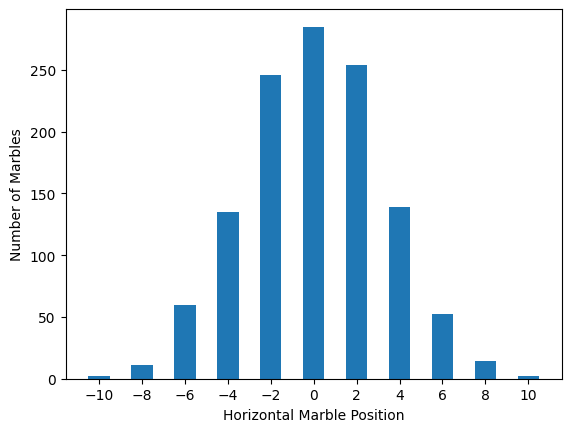

In [10]:
bins = np.arange(-10,12)
plt.hist(sim, bins=bins, align='left')
plt.xticks(bins[::2])
plt.xlabel('Horizontal Marble Position')
plt.ylabel('Number of Marbles');

One interesting trend that appears in the above histogram is that all locations are integers. This is because we used whole numbers for our left and right movements of marbles (i.e., +1 and -1) and used ten layers in the above simulation. There is no way to produce an odd integer by totaling a series of ten +1 or -1 integers. If we changed the number of layers to an odd number, we'd only get odd positions in the result, and if we used +1/2 and -1/2 for our horizontal movement, we'd get both even and odd integers.

## Calculating pi

As a second appliation of random number generaters, we will calclate a numerical value for $\pi$. Imagine a circle with radius = $r$ inscribed inside a square of side length $2r$. 

![](tutorial-stochastic/circle_square.png)

**Figure 2.** The circle radius r inscribed in a square with side length of 2r.

The areas of the circle and square are described by $A
_{circle} = \pi r^2$ and $A_{square} = 4r^2$, respectively. If we divide the area of the circle by the area of the square, we get $\pi / 4$.

$$ \frac { A_{circle} }{ A_{square} } = \frac {\pi r^2} {(2r)^2} = \frac {\pi r^2} {4r^2} = \frac {\pi}{4} $$

This means that four times the ratio of the area of the circle and square equals $\pi$.

$$ \frac { A_{circle} }{ A_{square}} \times 4 = \pi $$

The challenge is now finding the ratio between the areas of the two shapes which can be done through a variety of creative means. Our method will be counting randomly placed dots. Imagine we painted the circle inscribed in a square on pavement outside and count the water droplets that fall in the circle and square during a rain storm.

![](tutorial-stochastic/circle_square_dots.png)

**Figure 3.** Random dots inside the circle and square used to estimate a value of $\pi$.

Because the rain drops fall randomly, the probability of a drop falling in one of the shapes is proportional to the area of that shape, so dividing the number of drops in the circle by the number of drop in the square provides a estimate of $\frac { A_{circle} }{ A_{square} }$ which then can be used to calculate $\pi$. Counting rain is a bit tedious and challenging, so we can simulate this using a random number generator to produce random ($x, y$) coordinates of dots inside the square. We then total the number of these that fall inside the circle versus the square and complete the calculation to obtain a value of $\pi$.

For smilicity, we will center our circle and square around the origin and give the circle a radius = 1. This requires the coordinates to fall in the [-1, 1) ranges along both the $x$- and $y$-axes. We have no random number generator that produces values in this range, but we can modify the `random()` method which generates floats in the [0, 1) range by multiplying by 2 and substracting 1 as demonstrated below.

~~~python
rng = np.random.default_rng()
x = 2 * rng.random() - 1
~~~

Below is a function that performs this simulation and calculation of $\pi$ with the only function argument `n_samples` as the number of dots generated. The general proceedure is ouline here.
1. Generate `n_samples` of ($x, y$) coordinates using the `random()` method
2. Calculate the distance from the origin using the `np.hypot()` function to determine if the dot is inside the circle (all dots are inside the square)
3. Calculate $\pi$

In [11]:
def estimate_pi(n_samples):
    '''(integer) -> pi (float)
    
    Estimates the value of pi by finding the ratio of the area of a unit circle/area of a unit square
    and multiplying by 4.
    '''

    n_samples = int(n_samples)
    
    # Step 1
    rng = np.random.default_rng()
    coords = rng.random(size=(n_samples, 2))

    # Step 2
    dist_from_origin = np.hypot(coords[:,0], coords[:,1]) # distance from the origion
    in_circle = dist_from_origin[dist_from_origin <= 1] # if <= 1, the point is inside the circle

    # Step 3
    pi = 4 * (in_circle.size / n_samples)
    
    return pi

We can then call this function with 100 dots generated. Because we are using a random number generator, every time we call this function, we likley get a different value for $\pi$.

In [12]:
estimate_pi(100)

3.08

In [13]:
estimate_pi(100)

3.16

We can also generate a value for $\pi$ using the `np.pi` to compare our answer to.

In [14]:
np.pi

3.141592653589793

Odds are that the values calculated above for $\pi$ above is close but not exactly 3.14. If we increase the number of dots, the value for $\pi$ will on average become closer to the true value. While it may be tempting to just call the function with an extremely large number of dots, this can take substatially longer to computer.

In [15]:
estimate_pi(1E8)

3.14157644

## Simulating radioactive decay

As a final example, we will simulate the radioactive decay of the radioactive nuclide $^{137m}$Ba to determine the quantity of undecayed material versus time. We will then compare it to an analytical model to see how well the two agree. Radioactive nuclei decay by first-order kinetics, which means that each radioactive nucleus has a fixed probability of decaying at any given time. This is analogous to how each six-sided die in a bucket has a fixed probability of rolling a one each time they are dumped out. This analogy is so good that we can simulate the decay process by generating a large number of random integers with fixed probabilities.

The first thing we need to is to know the probability of a nucleus decaying in a single second. Because this is a first-order process, the rate (-dA/dt) is described by

$$ \frac{-dA}{dt} = kA $$

where A is the quantity of $^{137m}$Ba, $t$ is time in seconds, and $k$ is the rate constant for this process. We also know that the half-life (t$_{1/2}$) of  $^{137m}$Ba is about 151 seconds which is related to the rate constant by the following equation.

$$ t_{1/2} = \frac{ln(2)}{k} $$

This means that $k$ = 4.59e$^{-3}$ s$^{-1}$. For first-order kinetics, this means that 4.59e$^{-3}$ fraction of the nuclei decays, so this is the probability we need to simulate this process using random numbers. The function below calculates the fraction of radioactive material remaining based on a rate constant `k` and allows the users to choose the number of simulated nuclei `n` and duraction of the simulation `n_final`.

In [16]:
def decay(k, n=1000, t_final=1000):
    '''floats and integers -> ndarray of integers

    Calculates the fraction of nuclei remaining at each second in the simulation given n initial 
    nuclei with a rate constant k of decaying each second and a final simulation time t_final.
    '''

    n_undecayed = n
    undecayed_array = np.full(t_final + 1, n)
    
    for second in range(1, t_final + 1):
        decays = rng.binomial(1, p=k, size=n_undecayed).sum()
        n_undecayed -= decays
        undecayed_array[second] = n_undecayed
        
    fraction = undecayed_array / n    
    
    
    return fraction

Below we simulate the decay of $^{137m}$Ba using a hundred simulated nuclei.

In [17]:
decay(4.59e-3, n=100)

array([1.  , 1.  , 1.  , ..., 0.01, 0.01, 0.01])

We can plot and compare this simulation to the analytical model for this simulation knowing that the fraction of undecayed nuclei ($\frac{A}{A_0}$) is described by the following first-order equation where $A_0$ and $A_t$ are the initial quantities and quantities of nuclei at time $t$.

$$ \frac{A_t}{A_0} = e^{-kt} $$

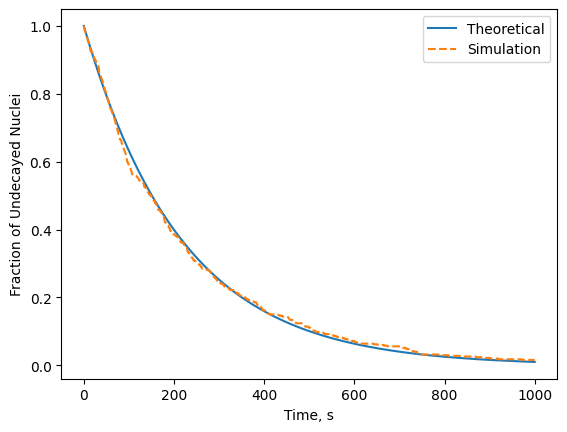

In [18]:
seconds = np.arange(1001)
fraction = np.exp(-4.59e-3 * seconds)

plt.plot(seconds, fraction, linestyle='-', label='Theoretical')
plt.plot(seconds, decay(4.59e-3, n=500), linestyle='--', label='Simulation')
plt.xlabel('Time, s')
plt.ylabel('Fraction of Undecayed Nuclei')
plt.legend();

The simulation is in good agreement with the theoretical model, but this is some discrepency. If we increase the number of simulated nuclei, the simulation should align better with the theoretical values.

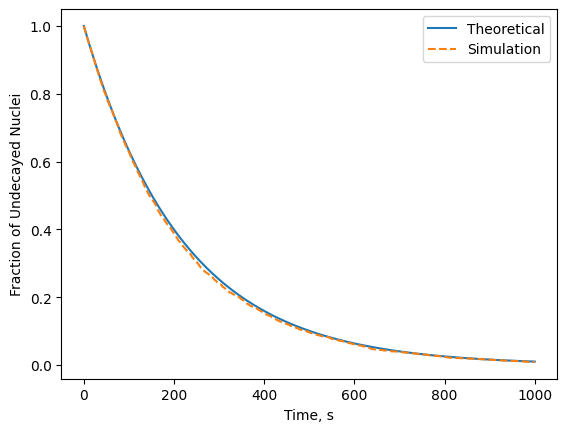

In [19]:
seconds = np.arange(1001)
fraction = np.exp(-4.59e-3 * seconds)

plt.plot(seconds, fraction, linestyle='-', label='Theoretical')
plt.plot(seconds, decay(4.59e-3, n=5000), linestyle='--', label='Simulation')
plt.xlabel('Time, s')
plt.ylabel('Fraction of Undecayed Nuclei')
plt.legend();

## Further reading

- To learn more about NumPy random number generators, see [Random Generator](https://numpy.org/doc/stable/reference/random/index.html)
- To learn more about random number distributions and their generation, see [Monte Carlo Simulation Part 5: Randomness & Random Number Generation](https://towardsdatascience.com/monte-carlo-simulation-421110b678c5?gi=f86d4ec9f452)
- For examples of using random variables for chemical simulations, see chapter 9 of [Scientific Computing for Chemists](https://weisscharlesj.github.io/SciCompforChemists/intro.html)